In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
len(test_labels)

(60000, 28, 28)
(10000, 28, 28)


10000

In [3]:
img_rows = train_images[0].shape[0]
img_cols = train_images[0].shape[1]


train_images = train_images.astype("float32") / 255.0

test_images = test_images.astype("float32") / 255.0

print(train_images.shape)

(60000, 28, 28)


In [8]:
model = keras.Sequential([
    layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(20, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

d:\DataScience\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 20)     │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        20,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,290 (98.79 KB)

 Trainable params: 25,290 (98.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

history = model.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5600 - loss: 1.4025
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8934 - loss: 0.3570
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9222 - loss: 0.2674
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9413 - loss: 0.2038
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9542 - loss: 0.1582
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9626 - loss: 0.1325
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9666 - loss: 0.1130
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9700 - loss: 0.1053
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9726 - loss: 0.0930
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9751 - loss: 0.0847
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9761 - loss: 0.0801
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

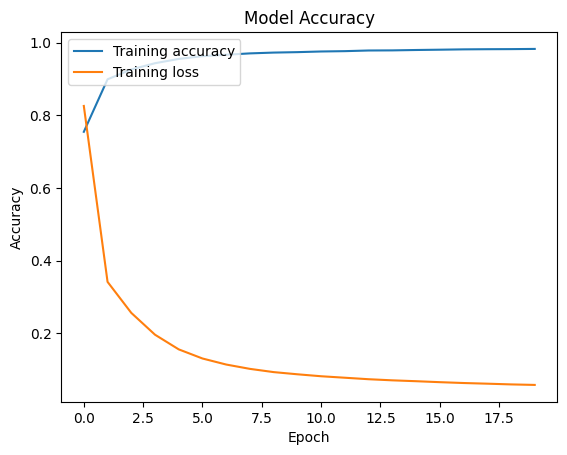

In [25]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

I used the same model architecture we used in the lab.